In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest

import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [10]:
df = pd.read_csv("dataset.csv")

print("Shape: " + str(df.shape))

print("First 10 rows of the dataset:")
display(df.head(10))

print("Dataset Info:")
df.info()

print("Missing values per column:")
display(df.isnull().sum())

df.dropna(inplace=True)
display(df.isnull().sum())

print("\nNumber of Duplicates:", df.duplicated().sum())

print(df.columns)

print("Summary Statistics:")
display(df.describe())

Shape: (500000, 26)
First 10 rows of the dataset:


,User ID,User Name,Driver Name,Car Condition,Weather,Traffic Condition,key,fare_amount,pickup_datetime,pickup_longitude,...,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
0,KHVrEVlD,Kimberly Adams,Amy Butler,Very Good,windy,Congested Traffic,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-1.288826,...,6,0,2009,20.265840,55.176046,14.342611,34.543548,27.572573,1.030764,-2.918897
1,lPxIuEri,Justin Tapia,Hannah Zimmerman,Excellent,cloudy,Flow Traffic,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-1.291824,...,1,1,2010,44.667679,31.832358,23.130775,15.125872,8.755732,8.450134,-0.375217
2,gsVN8JLS,Elizabeth Lopez,Amanda Jackson,Bad,stormy,Congested Traffic,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-1.291242,...,8,3,2011,43.597686,33.712082,19.865289,17.722624,9.847344,1.389525,2.599961
3,9I7kWFgd,Steven Wilson,Amy Horn,Very Good,stormy,Flow Traffic,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-1.291319,...,4,5,2012,42.642965,32.556289,21.063132,15.738963,7.703421,2.799270,0.133905
4,8QN5ZaGN,Alexander Andrews,Cassandra Larson,Bad,stormy,Congested Traffic,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-1.290987,...,3,1,2010,43.329953,39.406828,15.219339,23.732406,15.600745,1.999157,-0.502703
5,mMC7oPiW,Kayla Martin,Wendy Bennett,Excellent,sunny,Congested Traffic,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45,-1.291560,...,1,3,2011,42.335622,32.824930,20.648176,15.741133,7.649541,3.787239,-0.674251
6,A2SNLxxM,James Burch,Casey Cannon,Excellent,windy,Flow Traffic,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00,-1.291195,...,11,1,2012,42.563234,35.482608,18.113693,19.126670,10.993150,1.555807,-0.342260
7,tT6AJSJx,Alexander Ingram,Christy Hensley,Good,sunny,Congested Traffic,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00,-1.290694,...,1,2,2012,42.533214,36.829343,16.949505,20.548489,12.449213,4.155444,2.236596
8,D0Yb52vL,Anita Porter,Ana Norton,Excellent,rainy,Dense Traffic,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-1.291656,...,12,0,2012,42.240568,29.608237,23.942272,11.667601,3.637447,1.253232,-1.119470
9,GorULe8F,Monica Smith,Daniel Vargas,Very Good,sunny,Dense Traffic,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00,-1.291206,...,9,2,2009,42.218767,33.106804,20.538553,16.193381,8.129651,2.849627,0.327463


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   User ID            500000 non-null  object 
 1   User Name          500000 non-null  object 
 2   Driver Name        500000 non-null  object 
 3   Car Condition      500000 non-null  object 
 4   Weather            500000 non-null  object 
 5   Traffic Condition  500000 non-null  object 
 6   key                500000 non-null  object 
 7   fare_amount        500000 non-null  float64
 8   pickup_datetime    500000 non-null  object 
 9   pickup_longitude   500000 non-null  float64
 10  pickup_latitude    500000 non-null  float64
 11  dropoff_longitude  499995 non-null  float64
 12  dropoff_latitude   499995 non-null  float64
 13  passenger_count    500000 non-null  int64  
 14  hour               500000 non-null  int64  
 15  day                500000 non-null  i

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    5
dropoff_latitude     5
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             5
ewr_dist             5
lga_dist             5
sol_dist             5
nyc_dist             5
distance             5
bearing              5
dtype: int64

User ID              0
User Name            0
Driver Name          0
Car Condition        0
Weather              0
Traffic Condition    0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
weekday              0
year                 0
jfk_dist             0
ewr_dist             0
lga_dist             0
sol_dist             0
nyc_dist             0
distance             0
bearing              0
dtype: int64


Number of Duplicates: 0
Index(['User ID', 'User Name', 'Driver Name', 'Car Condition', 'Weather',
       'Traffic Condition', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'weekday', 'year', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist',
       'nyc_dist', 'distance', 'bearing'],
      dtype='object')
Summary Statistics:


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing
count,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000,499995.000000
mean,11.358182,-1.265714,0.696742,-1.265755,0.696675,1.683445,13.510843,15.684239,6.268617,3.042020,2011.739129,385.279367,380.503657,363.843772,363.674038,355.991423,19.468775,0.297145
std,9.916069,0.206934,0.140906,0.205903,0.128997,1.307391,6.511596,8.681092,3.437798,1.949243,1.860897,2419.087483,2428.804740,2425.075903,2428.348683,2428.730839,367.299601,1.804548
min,-44.900000,-52.119764,-54.389440,-59.049665,-44.676047,0.000000,0.000000,1.000000,1.000000,0.000000,2009.000000,1.017646,1.460945,0.382119,0.532545,0.080500,0.000000,-3.141593
25%,6.000000,-1.291405,0.710958,-1.291393,0.710943,1.000000,9.000000,8.000000,3.000000,1.000000,2010.000000,41.341514,32.173712,17.100762,14.886989,7.147384,1.214550,-0.854721
50%,8.500000,-1.291226,0.711268,-1.291197,0.711277,1.000000,14.000000,16.000000,6.000000,3.000000,2012.000000,42.523163,34.787507,19.591554,18.347580,10.458151,2.116970,-0.050442
75%,12.500000,-1.290970,0.711520,-1.290908,0.711538,2.000000,19.000000,23.000000,9.000000,5.000000,2013.000000,43.785649,38.304502,22.214815,22.417812,14.448699,3.890070,2.206769
max,500.000000,37.360538,29.724576,0.712985,7.061893,6.000000,23.000000,31.000000,12.000000,6.000000,2015.000000,30133.067880,30167.595967,30167.285794,30159.407296,30162.285356,12399.956433,3.141593


# Remove Outliers

In [11]:
numeric_columns = ['fare_amount', 'jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance']
iso = IsolationForest(contamination=0.05, random_state=42)
iso.fit(df[numeric_columns])

preds = iso.predict(df[numeric_columns])

df = df[preds == 1]

print(df.head())
df.shape

    User ID          User Name       Driver Name Car Condition Weather  \
0  KHVrEVlD     Kimberly Adams        Amy Butler     Very Good   windy   
1  lPxIuEri       Justin Tapia  Hannah Zimmerman     Excellent  cloudy   
2  gsVN8JLS    Elizabeth Lopez    Amanda Jackson           Bad  stormy   
3  9I7kWFgd      Steven Wilson          Amy Horn     Very Good  stormy   
4  8QN5ZaGN  Alexander Andrews  Cassandra Larson           Bad  stormy   

   Traffic Condition                            key  fare_amount  \
0  Congested Traffic    2009-06-15 17:26:21.0000001          4.5   
1       Flow Traffic    2010-01-05 16:52:16.0000002         16.9   
2  Congested Traffic   2011-08-18 00:35:00.00000049          5.7   
3       Flow Traffic    2012-04-21 04:30:42.0000001          7.7   
4  Congested Traffic  2010-03-09 07:51:00.000000135          5.3   

       pickup_datetime  pickup_longitude  ...  month  weekday  year  \
0  2009-06-15 17:26:21         -1.288826  ...      6        0  2009   
1  2

(474995, 26)

# Data Preprocessing & Feature Engineering

In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.weekday
df['year'] = df['pickup_datetime'].dt.year

# 'is_peak' (1 if hour between 7-9 or 16-19, else 0)
df['is_peak'] = df['hour'].apply(lambda x: 1 if (7 <= x <= 9 or 16 <= x <= 19) else 0)

# Drop identifiers
drop_cols = ['User ID', 'User Name', 'Driver Name', 'key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'year', 'day']
df.drop(columns=drop_cols, inplace=True)

# Remove rows where distance is 0
df = df[df['distance'] > 0]

# Categorical Features and Feature Scaling

In [13]:
target = 'fare_amount'
features = [col for col in df.columns if col != target]

categorical_cols = ['Car Condition', 'Weather', 'Traffic Condition']
no_change_cols = ['hour', 'month', 'weekday', 'is_peak', 'passenger_count']
numeric_cols = [col for col in features if col not in categorical_cols + no_change_cols]

X = df[features]
y = df[target]

# One-Hot Encode categorical features
X_cat = pd.get_dummies(X[categorical_cols], drop_first=True)

# Standardize numerical features
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X[numeric_cols]), columns=numeric_cols, index=X.index)

X = pd.concat([X_num, X_cat, X[no_change_cols]], axis=1)

print(X.columns)
display(X.head(10))

Index(['jfk_dist', 'ewr_dist', 'lga_dist', 'sol_dist', 'nyc_dist', 'distance',
       'bearing', 'Car Condition_Excellent', 'Car Condition_Good',
       'Car Condition_Very Good', 'Weather_rainy', 'Weather_stormy',
       'Weather_sunny', 'Weather_windy', 'Traffic Condition_Dense Traffic',
       'Traffic Condition_Flow Traffic', 'hour', 'month', 'weekday', 'is_peak',
       'passenger_count'],
      dtype='object')


,jfk_dist,ewr_dist,lga_dist,sol_dist,nyc_dist,distance,bearing,Car Condition_Excellent,Car Condition_Good,Car Condition_Very Good,...,Weather_stormy,Weather_sunny,Weather_windy,Traffic Condition_Dense Traffic,Traffic Condition_Flow Traffic,hour,month,weekday,is_peak,passenger_count
0,-8.300706,4.726783,-1.306661,3.241271,3.525513,-0.754753,-1.764065,False,False,True,...,False,False,True,False,False,17,6,0,1,1
1,0.874225,-0.781229,1.005177,-0.656470,-0.380508,2.141405,-0.378319,True,False,False,...,False,False,False,False,True,16,1,1,1,1
2,0.471915,-0.337703,0.146149,-0.135220,-0.153910,-0.614711,1.242499,False,False,False,...,True,False,False,False,False,0,8,3,0,2
3,0.112946,-0.610415,0.461257,-0.533403,-0.598948,-0.064415,-0.100960,False,False,True,...,True,False,False,False,True,4,4,5,0,1
4,0.371249,1.005989,-1.076027,1.071133,1.040388,-0.376740,-0.447771,False,False,False,...,True,False,False,False,False,7,3,1,1,1
5,-0.002613,-0.547029,0.352097,-0.532968,-0.610132,0.321240,-0.541227,True,False,False,...,False,True,False,False,False,9,1,3,1,1
6,0.082968,0.080058,-0.314630,0.146616,0.083938,-0.549802,-0.360365,True,False,False,...,False,False,True,False,True,20,11,1,0,1
7,0.071680,0.397824,-0.620885,0.432021,0.386189,0.464969,1.044545,False,True,False,...,False,True,False,False,False,17,1,2,1,1
8,-0.038353,-1.306017,1.218651,-1.350654,-1.442968,-0.667913,-0.783773,True,False,False,...,False,False,False,True,False,13,12,0,0,1
9,-0.046550,-0.480520,0.323260,-0.442187,-0.510471,-0.044758,0.004487,False,False,True,...,False,True,False,True,False,1,9,2,0,2


# Splitting Data for Training and Testing

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression

In [15]:
lr = LinearRegression()
lr_params = {}

grid_lr = GridSearchCV(lr, lr_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, return_train_score=True)
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
preds_lr = best_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, preds_lr))
r2_lr = r2_score(y_test, preds_lr)

print("=== Linear Regression Report ===")
print("Best Parameters:", grid_lr.best_params_)
print("Best CV Negative MSE: {:.3f}".format(grid_lr.best_score_))
print("Test RMSE: {:.3f}".format(rmse_lr))
print("Test R² Score: {:.3f}".format(r2_lr))
print("\nDetailed CV results:")
cv_results_lr = pd.DataFrame(grid_lr.cv_results_)
print(cv_results_lr[['params', 'mean_test_score', 'std_test_score']])

=== Linear Regression Report ===
Best Parameters: {}
Best CV Negative MSE: -13.655
Test RMSE: 3.691
Test R² Score: 0.719

Detailed CV results:
  params  mean_test_score  std_test_score
0     {}       -13.655077        0.362101


# Random Forest Regressor

In [16]:
rf = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

random_search_rf = RandomizedSearchCV(
    rf, rf_params,
    n_iter=5,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True,
    random_state=42
)
random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_
preds_rf = best_rf.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, preds_rf))
r2_rf = r2_score(y_test, preds_rf)

print("\n=== Random Forest Report ===")
print("Best Parameters:", random_search_rf.best_params_)
print("Best CV Negative MSE: {:.3f}".format(random_search_rf.best_score_))
print("Test RMSE: {:.3f}".format(rmse_rf))
print("Test R² Score: {:.3f}".format(r2_rf))



=== Random Forest Report ===
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'max_depth': None}
Best CV Negative MSE: -10.566
Test RMSE: 3.229
Test R² Score: 0.785


# Gradient Boosting Regressor

In [17]:
gbr = GradientBoostingRegressor(random_state=42)
gbr_params = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

random_search_gbr = RandomizedSearchCV(
    gbr,
    gbr_params,
    n_iter=5,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    return_train_score=True,
    random_state=42
)

random_search_gbr.fit(X_train, y_train)

best_gbr = random_search_gbr.best_estimator_
preds_gbr = best_gbr.predict(X_test)
rmse_gbr = np.sqrt(mean_squared_error(y_test, preds_gbr))
r2_gbr = r2_score(y_test, preds_gbr)

print("\n=== Gradient Boosting Report ===")
print("Best Parameters:", random_search_gbr.best_params_)
print("Best CV Negative MSE: {:.3f}".format(random_search_gbr.best_score_))
print("Test RMSE: {:.3f}".format(rmse_gbr))
print("Test R² Score: {:.3f}".format(r2_gbr))


=== Gradient Boosting Report ===
Best Parameters: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best CV Negative MSE: -10.659
Test RMSE: 3.241
Test R² Score: 0.783


# Compare Performance

In [18]:
results = {
    'Linear Regression': {'RMSE': rmse_lr, 'R2': r2_lr},
    'Random Forest': {'RMSE': rmse_rf, 'R2': r2_rf},
    'Gradient Boosting': {'RMSE': rmse_gbr, 'R2': r2_gbr}
}

print("\n=== Model Comparison Summary ===")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"   RMSE: {metrics['RMSE']:.3f}")
    print(f"   R² Score: {metrics['R2']:.3f}")

best_model_name = min(results, key=lambda m: results[m]['RMSE'])
print("\nBest performing model based on RMSE:", best_model_name, "with RMSE:", results[best_model_name]['RMSE'])


=== Model Comparison Summary ===
Linear Regression:
   RMSE: 3.691
   R² Score: 0.719
Random Forest:
   RMSE: 3.229
   R² Score: 0.785
Gradient Boosting:
   RMSE: 3.241
   R² Score: 0.783

Best performing model based on RMSE: Random Forest with RMSE: 3.2287885410823915


# Plot residuals for the best model

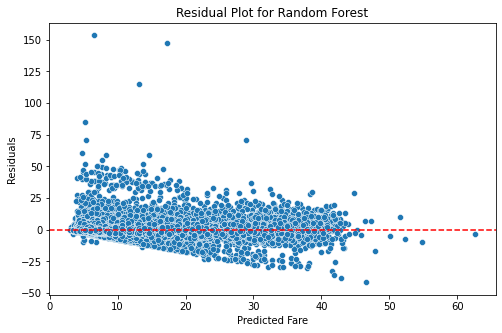

In [ ]:
if best_model_name == 'Random Forest':
    best_model = best_rf
elif best_model_name == 'Gradient Boosting':
    best_model = best_gbr
else:
    best_model = best_lr

preds_best = best_model.predict(X_test)
residuals = y_test - preds_best

plt.figure(figsize=(8, 5))
sns.scatterplot(x=preds_best, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals')
plt.title(f'Residual Plot for {best_model_name}')
plt.show()

# Save Models & Scalar

In [21]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(best_rf, f)

with open('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(best_gbr, f)

with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(best_lr, f)

print("Models have been saved successfully!")

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Scalar have been saved successfully!")

Models have been saved successfully!
Scalar have been saved successfully!


#